### Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
        a. Loading and preprocessing the image data
        b. Defining the model's architecture
        c. Training the model
        d. Estimating the model's performance

In [1]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2022-11-15 13:57:42.058422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 13:57:42.251646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 13:57:42.251673: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 13:57:42.291469: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 13:57:43.052987: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#if there are 2 datasets mnist_train.csv and mnist_test.csv

# train_data = pd.read_csv('mnist_train.csv')
# test_data = pd.read_csv('mnist_test.csv')

# x_train = train_data.drop('labels', axis=1)
# x_test = test_data.drop('labels', axis=1)

# y_train = train_data['labels']
# y_test =  test_data['labels']

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
## Reshaping by converting to array
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [5]:
## Scaling 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Defining the model's architecture

In [6]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

2022-11-15 13:57:45.637729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 13:57:45.637762: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 13:57:45.637786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-11-15 13:57:45.638027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

In [7]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

2022-11-15 13:57:45.785857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
118/118 [==============================] - 14s 113ms/step - loss: 0.4471 - accuracy: 0.8780
Epoch 2/10
118/118 [==============================] - 15s 131ms/step - loss: 0.1705 - accuracy: 0.9506
Epoch 3/10
118/118 [==============================] - 13s 110ms/step - loss: 0.1176 - accuracy: 0.9651
Epoch 4/10
118/118 [==============================] - 13s 111ms/step - loss: 0.0895 - accuracy: 0.9733
Epoch 5/10
118/118 [==============================] - 13s 110ms/step - loss: 0.0728 - accuracy: 0.9782
Epoch 6/10
118/118 [==============================] - 13s 112ms/step - loss: 0.0614 - accuracy: 0.9814
Epoch 7/10
118/118 [==============================] - 12s 101ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 8/10
118/118 [==============================] - 12s 104ms/step - loss: 0.0448 - accuracy: 0.9863
Epoch 9/10
118/118 [==============================] - 15s 125ms/step - loss: 0.0403 - accuracy: 0.9877
Epoch 10/10
118/118 [==============================] - 13s 106ms/step - l

## Estimating the model's performance

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9854
Test Loss: 0.04426494613289833, Test Accuracy: 0.9854000210762024


In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


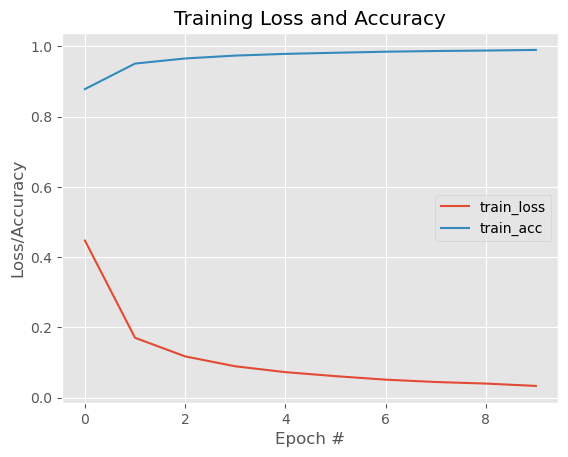

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Checking Predictions

1/1 [==============================] - 0s 19ms/step
2


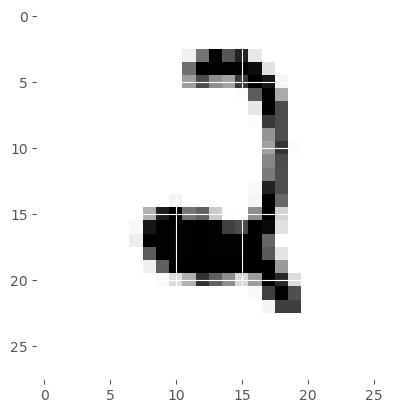

In [13]:
image_index = 4445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())